# I- Connection à votre drive pour la lecture des données:

Cette étape est nécessaire seulement si vous travailler sous Colab. Si vous travailler avec un aure éditeur python sur votre machine, il suffit de placer le fichier "formage.txt" dans votre répertoire de travail.

1- Créer sur votre drive google un répertoire au nom "data" et importer dedans le fichier "data.txt"

2- Créer une connection à votre drive en exécutant le code suivant:

```
from google.colab import drive
drive.mount(‘/content/drive’)
```
4- Suivre les étapes de connection et copier le lien envoyé.
Si vous avez de difficultés, vous pouvez visualiser cette vidéo: https://youtu.be/TDyfhlg23vs



In [3]:
#céer une connection avec google colab
import pandas as pd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


# II- Importation des données "fromage.txt" dans un frame pandas : 
Le fichier « fromage.txt » provient de la page de cours de Marie Chavent de l’Université de Bordeaux.
Il contient un ensemble de fromages (29
observations) décrits par leurs propriétés nutritives (ex. protéines, lipides, etc. ; 9 variables).

 L’objectif est d’identifier des groupes de fromages homogènes, partageant des caractéristiques similaires.

Compléter le code suivant afin d’importer les données du fichier pima.csv et afficher les caractéristiques correspondantes.
1- Importer la librairie pandas

2- Importer les données du fichier "fromage.txt"  dans un frame Pandas (copier le chemin complet à partir de votre drive)

3- Afficher les dimensions de la table avec la propriété shape 
4- Afficher les types des colonnes 
5- Afficher les 4 première ligne du dataframe.

In [4]:
#importer  la librairie Pandas
import pandas as pd
#lecture du fichier "fromage.txt" avec la fonction read_table de pandas
#header = 0, la première ligne correspond à l'entête (intitulé des champs)
fromage = pd.read_table("/content/drive/MyDrive/ML/data/fromage.txt",sep="\t",header=0,index_col=0)

#afficher les dimensions de la table  (fonction shape) ainsi que leur types (propriété dtype)
print(fromage.shape ) 
#afficher la liste des colonnes et leurs types avec la fonction dtypes
print(fromage.dtypes)
#afficher les 4 premières ligne de la table
print(fromage[:4])

(29, 9)
calories         int64
sodium         float64
calcium        float64
lipides        float64
retinol        float64
folates        float64
proteines      float64
cholesterol      int64
magnesium        int64
dtype: object
             calories  sodium  calcium  ...  proteines  cholesterol  magnesium
Fromages                                ...                                   
CarredelEst       314   353.5     72.6  ...       21.0           70         20
Babybel           314   238.0    209.8  ...       22.6           70         27
Beaufort          401   112.0    259.4  ...       26.6          120         41
Bleu              342   336.0    211.1  ...       20.2           90         27

[4 rows x 9 columns]


# II- Statistiques et description de la base

Avant de la segmentation des données, il est intéressant de comprendre la nature des variables descriptives ainsi que les corrélations entre elles.

1.   Afficher les statistiques descriptives de la table : vous pouvez utiliser la fonction describe de pandas (`objet.describe()`)
2.   Afficher le graphique de corrélation deux à deux des variables en utilisant le fonction scatter_mtarix de pandas:
https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html. 

Pour ce faire, reprenez les deux lignes suivantes: 
```
from pandas.plotting import scatter_matrix
scatter_matrix(fromage,figsize=(9,9))
```




         calories      sodium     calcium  ...  proteines  cholesterol  magnesium
count   29.000000   29.000000   29.000000  ...  29.000000    29.000000  29.000000
mean   300.034483  210.086207  185.734483  ...  20.168966    74.586207  26.965517
std     91.914356  108.678923   72.528882  ...   6.959788    28.245755  11.318388
min     70.000000   22.000000   72.600000  ...   4.100000    10.000000  10.000000
25%    292.000000  140.000000  132.900000  ...  17.800000    70.000000  20.000000
50%    321.000000  223.000000  202.300000  ...  21.000000    80.000000  26.000000
75%    355.000000  276.000000  220.500000  ...  23.400000    90.000000  30.000000
max    406.000000  432.000000  334.600000  ...  35.700000   120.000000  51.000000

[8 rows x 9 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f818f33e550>,
      dtype=object)

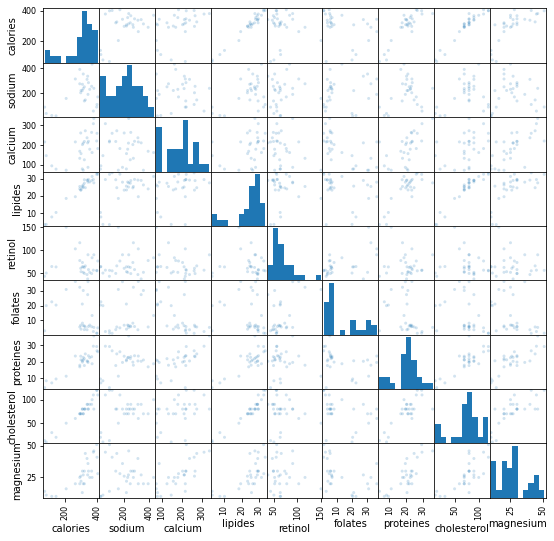

In [5]:
from pandas.plotting import scatter_matrix
#Affichage des statistiques descriptives
print(fromage.describe())
#affichage du graphique de corrélation
scatter_matrix(fromage,alpha=0.2,figsize=(9,9))

# IV- Clustering des données avec la  méthode K-means

On se propose maintenant de grouper les types de fromage en utilisant la méthode de K-means. 

1.   Importer la librairie cluster de sklearn
2.   Créer une instance de la classe Kmeans avec 4 clusters
3.   Lancer l'apprentissage: la fonction `fit` pour les classes de cluster prend un seul argument: le dataframe des données à segmenter (fromage)  
4.   Enregistrer dans une variable  '`labelsKM`' les labels des clusters retournés par la fonction predict de Kmeans (`Kmeans.predict(fromage)`). Afficher la variable  '`labelsKM`'
5. Enregsitrer dans une variable '`CentresKM`' les centres des clusters définis par KMeans (`KMeans.cluster_centers_`)



[2 3 0 3 3 3 2 2 0 0 2 0 0 2 3 1 1 3 3 0 1 2 3 3 3 0 2 0 1]
[[363.875      146.125      257.025       29.05        63.6
    3.8625      26.5625      96.25        38.875     ]
 [101.75        44.75       133.75         6.275       55.15
   16.475        7.2         18.25        11.25      ]
 [297.85714286 239.78571429 103.84285714  24.91428571  83.92857143
   23.05714286  18.97142857  71.42857143  21.71428571]
 [329.8        306.6        206.82        26.87        64.24
   11.91        21.08        82.          27.4       ]]


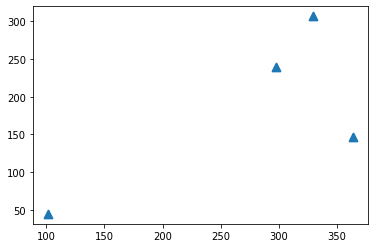

In [ ]:
#k-means sur les données des fromages
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

#création d'un clusetr Kmean avec nombre de clusters 4
kmeans = cluster.KMeans(n_clusters=4)
#Apprentissage (segmetation)
kmeans.fit(fromage)
#Prédiction et enregistrement des labels 
labelskm= kmeans.predict(fromage)
#Affichage des labels
print(labelskm)
#enregistrement des centres des clusters
centresKM=kmeans.cluster_centers_
print(centresKM)
plt.scatter(centresKM[:,0],centresKM[:,1], s=60,marker='^',linewidth=2)
#plt.scatter(fromage.iloc[:,0],fromage.iloc[:,1],c=labelsKM,s=60)


# V- Clustering  avec la méthode hiérarchique Agglomerative
Comme deuxième approche de segmentation, nous utiliserons la méthode hiérarchique agglo

1. Importer la librairie  AgglomerativeClustering dans scikit-learn.cluser : 
`from sklearn.cluster import AgglomerativeClustering`

2.  Créer une instance CHA de la classe AgglomerativeClustering avec un nombre de clusters égal à 4.
3. Appliquer la segmentation sur les données 'fromage'  comme ce qui a été fait avec Kmeans.

4. Enregistrer dans une variable 'labelsCHA' les labels des clusters retournés par la fonction `fit_predict` de CHA (CHA.fit_predict(fromage)). Afficher la variable 'labelsCHA'

##Affichage du dendrogramme
La libraririe `scipy.cluster.hierarchy`permet de générer et afficher le dendrogramme des méthodes hiérarchiques de clustering.
* Importer la bibliothèque `scipy.cluster.hierarchy` sous le nom `sch`
* générer le dendrogramme avec la ligne de code:

dendrogram = sch.dendrogram(sch.linkage(fromage, method='ward'))





In [6]:
from sklearn.cluster import AgglomerativeClustering
#création d'une  CHA
CHA=AgglomerativeClustering(n_clusters = 4)
#Apprentissage (segmetation)
CHA.fit(fromage)
#Prédiction et enregistrement des labels
labelsCHA = CHA.fit_predict(fromage)
print(labelsCHA)
#enregistrement des centres des clusters
centresCHA=CHA.

#Affichage du dendrogramme de la méthode hiérarchique
#importer la librarairie scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch
#générer le dendrogramme des méthodes hiérarchique 
dendrogram = sch.dendrogram(sch.linkage(fromage, method='ward'))

SyntaxError: ignored

# VI- Validation et croisement des résultats

La mesure `silhouette_score` est utilisée pour mesurer la performance des clusters.  Ce score mesure la distance entre chaque point d'un cluster et les points des clusters voisins.

**Analyse du score Silhouette**
La plage du score Silhouette est [-1, 1]. Son analyse est la suivante :

* Si le Score est proche de +1 : Score Silhouette 
indique que l'échantillon est loin de son cluster voisin.
* si le score est proche de 0 : Score Silhouette indique que l'échantillon est sur ou très près de la frontière de décision séparant deux clusters voisins. 
* si le score est proche de -1 : Score Silhouette indique que les échantillons ont été assignés aux mauvais clusters.

1. Importer la libraire metrics de scikit-learn
2. Calculer les scores de Silouhette des deux clusters (ex: `metrics.silhouette_score(fromage,labelskm)`)
3. Comparer les deux modèles
4. Croiser les deux listes de labels (labelskm et labelsCHA) en utilisant  la fonction crosstab définie dans la librairie pandas. Interpréter la matrice résultat.


In [ ]:
#librairie pour évaluation des partitions
from sklearn import metrics
# ffichage de la fonction 
print("silouhette_score : ",metrics.silhouette_score(fromage,kmeans.labels_))
print("silouhette_score : ",metrics.silhouette_score(fromage,labelsCHA))
#correspondance avec les groupes de kmeans
pd.crosstab(labelskm,labelsCHA)
print(centresKM)


#distances aux centres de classes des observations
#plt.scatter(fromage[labels==0, 0], fromage[labels==0, 1], s=50, marker='o', color='red')
#plt.scatter(fromage[labels==1, 0], fromage[labels==1, 1], s=50, marker='o', color='blue')
#plt.scatter(fromage[labels==2, 0], fromage[labels==2, 1], s=50, marker='o', color='green')
#plt.scatter(fromage[labels==3, 0], fromage[labels==3, 1], s=50, marker='o', color='purple')
#plt.show()
#print(kmeans.transform(fromage))
#import seaborn as sns
#fromage['group'] = groups
#sns.lmplot("proteines", "cholesterol", data=fromage, col='group',fit_reg=False)

silouhette_score :  0.3369907041718868
silouhette_score :  0.31556786198229153


col_0,0,1,2,3
row_0,,,,
0,1,6,3,0
1,0,0,0,4
2,0,1,6,0
3,8,0,0,0


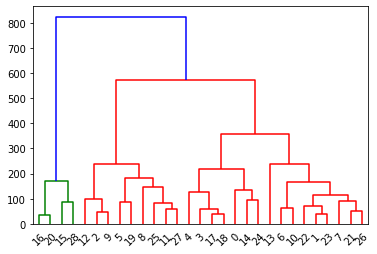

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(fromage, method='ward'))